In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# from sklearn.metrics import f1_score
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import seaborn as sns
import matplotlib.pyplot as plt
import os
import cv2
import glob
print(os.listdir("input/"))

# Any results you write to the current directory are saved as output.

['sample_submission_yxjOnvz.csv', 'test_vc2kHdQ.csv', 'train']


In [ ]:
from pathlib import Path
from fastai import *
from fastai.vision import *
import torch
from fastai.callbacks.hooks import *

In [ ]:
data_folder = Path("input/")

In [ ]:
data_path = "input/train/images/"
path = os.path.join(data_path , "*jpg")

In [ ]:
files = glob.glob(path)
data=[]
for file in files:
    image = cv2.imread(file)
    data.append(image)

In [ ]:
train_df = pd.read_csv('input/train/train.csv')
test_df = pd.read_csv('input/test_vc2kHdQ.csv')
submit = pd.read_csv('input/sample_submission_yxjOnvz.csv')

In [ ]:
train_df.shape, test_df.shape

((1646, 2), (706, 1))

In [ ]:
train_df.head()

,image_names,emergency_or_not
0,1503.jpg,0
1,1420.jpg,0
2,1764.jpg,0
3,1356.jpg,0
4,1117.jpg,0


In [ ]:
test_df.head()

,image_names
0,1960.jpg
1,668.jpg
2,2082.jpg
3,808.jpg
4,1907.jpg


In [ ]:
train_df.groupby('emergency_or_not').count()

,image_names
emergency_or_not,
0,965
1,681


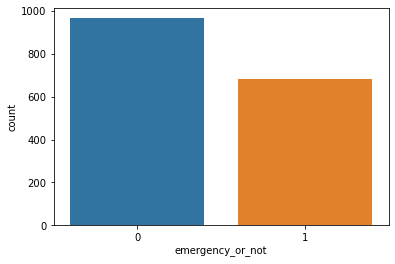

In [ ]:
sns.countplot(x='emergency_or_not' , data=train_df)

In [ ]:
train_images = data[:1646]
test_images= data[1646:]

In [ ]:
category = {'Emegerncy': 0, 
'Not_Emegerncy': 1}

In [ ]:
def plot_class(cat):
    
    fetch = train_df.loc[train_df['emergency_or_not']== category[cat]][:3]
    fig = plt.figure(figsize=(20,15))
    
    for i , index in enumerate(fetch.index ,1):
        plt.subplot(1,3 ,i)
        plt.imshow(train_images[index])
        plt.xlabel(cat + " (Index:" +str(index)+")" )
    plt.show()

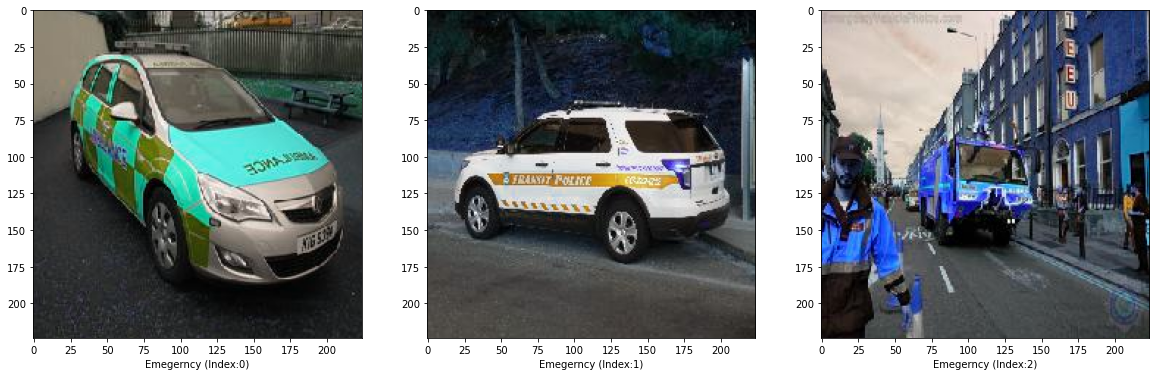

In [ ]:
plot_class('Emegerncy')

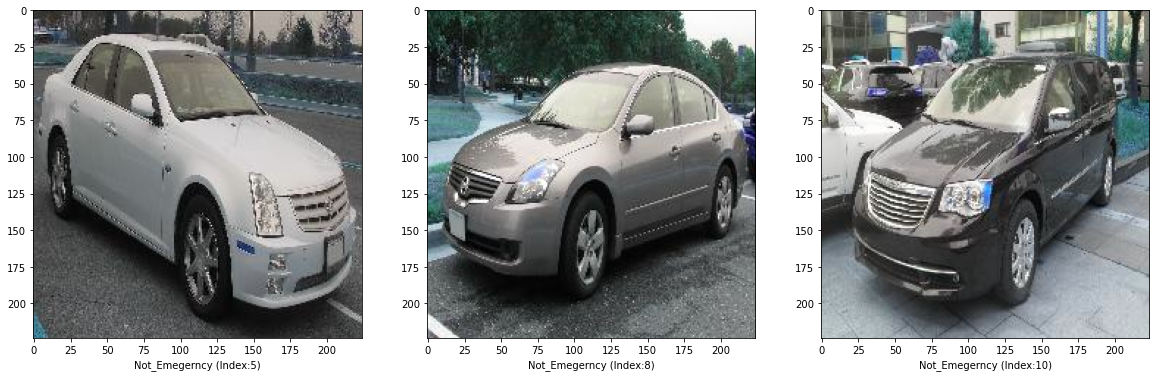

In [ ]:
plot_class('Not_Emegerncy')

In [ ]:
tfms = get_transforms(do_flip=False,flip_vert=False ,max_rotate=10.0, max_zoom=1.22, max_lighting=0.22, max_warp=0.0, p_affine=0.75,
                      p_lighting=0.75)
#, xtra_tfms=zoom_crop(scale=(0.9,1.8), do_rand=True, p=0.8))

## create databunch of test set to be passed
test_img = ImageList.from_df(test_df, path=data_folder/'train', folder='images')

In [ ]:
np.random.seed(145)
## create source of train image databunch
src = (ImageList.from_df(train_df, path=data_folder/'train', folder='images')
       .split_by_rand_pct(0.2)
       #.split_none()
       .label_from_df()
       .add_test(test_img))

In [ ]:
data = (src.transform(tfms, size=299,padding_mode='reflection',resize_method=ResizeMethod.SQUISH)
        .databunch(path='.', bs=32, device= None))

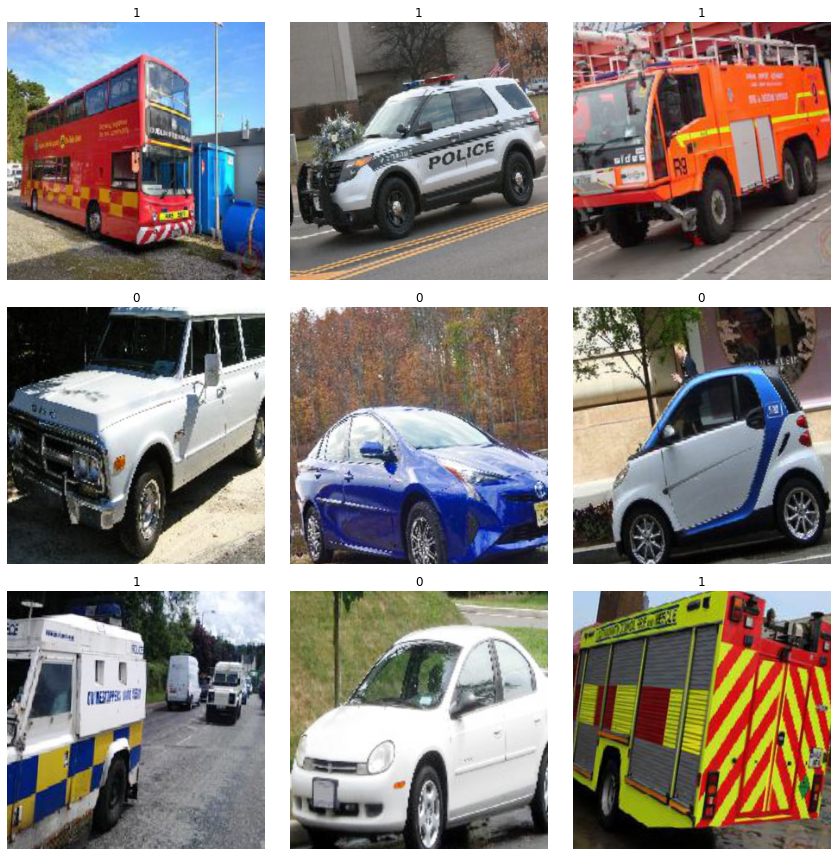

In [ ]:
data.show_batch(rows=3, figsize=(12,12))

In [ ]:
print(data.classes)

[0, 1]


In [ ]:
learn = cnn_learner(data=data, base_arch=models.resnet101, metrics=[FBeta(beta=1, average='macro'), accuracy],
                    callback_fns=ShowGraph)

Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to C:\Users\saikrithik/.cache\torch\checkpoints\resnet101-5d3b4d8f.pth
100.0%


In [ ]:
learn.summary()

Sequential
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [64, 150, 150]       9,408      False     
______________________________________________________________________
BatchNorm2d          [64, 150, 150]       128        True      
______________________________________________________________________
ReLU                 [64, 150, 150]       0          False     
______________________________________________________________________
MaxPool2d            [64, 75, 75]         0          False     
______________________________________________________________________
Conv2d               [64, 75, 75]         4,096      False     
______________________________________________________________________
BatchNorm2d          [64, 75, 75]         128        True      
______________________________________________________________________
Conv2d               [64, 75, 75]         36,864     False     
___________________________________________________

In [ ]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

epoch,train_loss,valid_loss,f_beta,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


KeyboardInterrupt: 